# Telecom Churn Case Study¶
## Group Members:
### Abishek Kachroo
### Tharun Kumar Reddy


In [478]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import gc 
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [479]:
df = pd.read_csv('telecom_churn_data.csv')

In [480]:
cols = df.columns

In [481]:
cols

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [482]:
pd.set_option('max_columns', None)

In [483]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [484]:
# df.astype(bool).sum(axis=0)

(df.isnull().sum()*100/ len(df)).sort_values(ascending = False)

In [485]:
ol = df.columns

co = df.loc[df[ol].str.contains('_9')== True]

In [486]:
x = np.percentile(df.total_rech_amt_8 ,70.0)

In [487]:
newdf = df

In [488]:
df.shape

(99999, 226)

In [489]:
newdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [490]:
amtInRecharge = newdf.columns[newdf.columns.str.contains('rech')]

In [491]:
amtInRecharge

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [492]:
#we are not taking 'total_rech_num_6'  as it shows the total number of recharges done in different months 
#we can clearly use the total amount factor to filter out the high value customers

In [493]:
amtInRecharge = newdf.columns[newdf.columns.str.contains('total_rech_amt|total_rech_data|av_rech')]

In [494]:
print(amtInRecharge)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


In [495]:
checkNull_amtInREcharge = 100*newdf.loc[:,amtInRecharge].isnull().sum()/len(newdf)
dftemp = pd.DataFrame(checkNull_amtInREcharge)
dftemp.rename(columns={0:'NullValue'}, inplace=True)
display(dftemp)

,NullValue
total_rech_amt_6,0.000000
total_rech_amt_7,0.000000
total_rech_amt_8,0.000000
total_rech_amt_9,0.000000
total_rech_data_6,74.846748
total_rech_data_7,74.428744
total_rech_data_8,73.660737
total_rech_data_9,74.077741
av_rech_amt_data_6,74.846748
av_rech_amt_data_7,74.428744


### all the recharge data has 74.84%  missing values that needs to be imputed

In [496]:
newdf['total_rech_data_6'] = newdf['total_rech_data_6'].replace(np.NaN,0.0)
newdf['total_rech_data_7'] = newdf['total_rech_data_7'].replace(np.NaN,0.0)
newdf['total_rech_data_8'] = newdf['total_rech_data_8'].replace(np.NaN,0.0)

In [497]:
newdf['av_rech_amt_data_6'] = newdf['av_rech_amt_data_6'].replace(np.NaN,0.0)
newdf['av_rech_amt_data_7'] = newdf['av_rech_amt_data_7'].replace(np.NaN,0.0)
newdf['av_rech_amt_data_8'] = newdf['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [498]:
newdf['totalRecharge6'] = newdf['total_rech_data_6']* newdf['av_rech_amt_data_6']
newdf['totalRecharge7'] = newdf['total_rech_data_7']* newdf['av_rech_amt_data_7']
newdf['totalRecharge8'] = newdf['total_rech_data_8']* newdf['av_rech_amt_data_8']

### now the 1st step is to filter out the high value customer based on the 70 percentile and that can be done by mixing the good phase i.e 6 and 7 row

In [499]:
a = newdf.columns[newdf.columns.str.contains('total_rech')]
a

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'],
      dtype='object')

newdf[newdf['total_rech_amt_6','mobile_number']]]

In [500]:
newdf['totalRecharge6&7'] = (newdf['total_rech_amt_6'] +newdf['totalRecharge6'])/2 + (newdf['total_rech_amt_7']+ newdf['totalRecharge7'])/2

In [501]:
missPercentage = newdf.isnull().sum() * 100 / len(newdf)
missPercentage

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_6     0.000000
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
last_date_of_month_9     1.659017
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              3.937039
onnet_mou_7              3.859039
onnet_mou_8              5.378054
onnet_mou_9              7.745077
offnet_mou_6             3.937039
offnet_mou_7             3.859039
offnet_mou_8             5.378054
offnet_mou_9             7.745077
roam_ic_mou_6            3.937039
roam_ic_mou_7            3.859039
roam_ic_mou_8            5.378054
roam_ic_mou_9            7.745077
roam_og_mou_6            3.937039
roam_og_mou_7            3.859039
roam_og_mou_8            5.378054
roam_og_mou_9            7.745077
loc_og_t2t_mou

In [502]:
newdf['fb_user_6'] = newdf['fb_user_6'].replace(np.NaN,0.0)
newdf['fb_user_7'] = newdf['fb_user_7'].replace(np.NaN,0.0)
newdf['fb_user_8'] = newdf['fb_user_8'].replace(np.NaN,0.0)

In [503]:
filterSeventyPercentile =  newdf['totalRecharge6&7'].quantile(0.7)
filterSeventyPercentile

478.0

In [504]:
df_highValueCustomer = newdf[newdf['totalRecharge6&7'] >filterSeventyPercentile]
df_highValueCustomer.shape

(29953, 230)

In [505]:
df_highValueCustomer.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,totalRecharge6,totalRecharge7,totalRecharge8,totalRecharge6&7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00

In [506]:
df_highValueCustomer['churnLabel']= np.where(df_highValueCustomer[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0,1,0)

In [507]:
df_highValueCustomer['churnLabel'].value_counts()/len(df_highValueCustomer)*100

0    91.877274
1     8.122726
Name: churnLabel, dtype: float64

In [508]:
for i in df_highValueCustomer.columns:
    if df_highValueCustomer[i].nunique() ==1:
        print("\n",i," hasn't variance and has only", df_highValueCustomer[i].nunique()," unique value ,hence dropping")
        df_highValueCustomer.drop(i, axis=1, inplace=True)


 circle_id  hasn't variance and has only 1  unique value ,hence dropping

 loc_og_t2o_mou  hasn't variance and has only 1  unique value ,hence dropping

 std_og_t2o_mou  hasn't variance and has only 1  unique value ,hence dropping

 loc_ic_t2o_mou  hasn't variance and has only 1  unique value ,hence dropping

 last_date_of_month_6  hasn't variance and has only 1  unique value ,hence dropping

 last_date_of_month_7  hasn't variance and has only 1  unique value ,hence dropping

 last_date_of_month_8  hasn't variance and has only 1  unique value ,hence dropping

 last_date_of_month_9  hasn't variance and has only 1  unique value ,hence dropping

 std_og_t2c_mou_6  hasn't variance and has only 1  unique value ,hence dropping

 std_og_t2c_mou_7  hasn't variance and has only 1  unique value ,hence dropping

 std_og_t2c_mou_8  hasn't variance and has only 1  unique value ,hence dropping

 std_og_t2c_mou_9  hasn't variance and has only 1  unique value ,hence dropping

 std_ic_t2o_mou_6  hasn'

In [509]:
df_highValueCustomer.shape

(29953, 215)

df_highValue.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'],axis=1,inplace=True)

In [510]:
colum = df_highValueCustomer.columns
df_nullpercent = df_highValueCustomer.isnull().sum() * 100 / len(df_highValueCustomer)
nulldf = pd.DataFrame({'colmname': colum,'nullpercent': df_nullpercent})

drop_cols = nulldf.loc[(nulldf["colmname"].str.contains('_9')==False) & (nulldf["nullpercent"] > 45.0)]
print("list of columns that are need to be  dropped:",drop_cols)

list of columns that are need to be  dropped:                                           colmname  nullpercent
date_of_last_rech_data_8  date_of_last_rech_data_8    46.799987
max_rech_data_8                    max_rech_data_8    46.799987
count_rech_2g_8                    count_rech_2g_8    46.799987
count_rech_3g_8                    count_rech_3g_8    46.799987
arpu_3g_8                                arpu_3g_8    46.799987
arpu_2g_8                                arpu_2g_8    46.799987
night_pck_user_8                  night_pck_user_8    46.799987


### now here the maximum recharge data is having more than 45% null but there is inference that those customers are maybe churned customers . So that data is real data and can be used later

In [511]:
df_highValueCustomer.shape

(29953, 215)

In [512]:
drop_9Columns = df_highValueCustomer.columns[df_highValueCustomer.columns.str.contains('_9')]

In [513]:
drop_9Columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9

In [514]:
drop_9Columns = ['arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9']

In [515]:
df_highValueCustomer.drop(drop_9Columns,axis =1,inplace=True)

In [516]:
df_highValueCustomer.shape

(29953, 164)

In [517]:
objectTypeCol = df_highValueCustomer.select_dtypes(include=['object'])
print(objectTypeCol.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
Name: 0, dtype: object


In [518]:
telecom_hv_cust = df_highValueCustomer

In [519]:
for col in objectTypeCol.columns:
    df_highValueCustomer[col] = pd.to_datetime(df_highValueCustomer[col])

df_highValueCustomer.shape

(29953, 164)

In [520]:
df_highValueCustomer.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,totalRecharge6,totalRecharge7,totalRecharge8,totalRecharge6&7,churnLabel
mobile_number,1.000000,0.033830,0.029606,0.034434,0.008271,0.003400,0.004811,0.019833,0.009907,0.015508,0.010008,-0.003306,0.003899,0.004907,-0.002499,-0.004480,0.046873,0.044117,0.043196,0.078337,0.074650,0.078313,0.051168,0.051805,0.055425,-0.013092,-0.015662,-0.008111,0.083230,0.079433,0.080553,-0.018179,-0.021918,-0.018376,-0.027019,-0.030859,-0.028118,0.025802,0.017759,0.021523,-0.029749,-0.035029,-0.030565,-0.003533,-0.003211,-0.004171,-0.019952,-0.022746,-0.015749,-0.007289,-0.001002,0.000492,0.021853,0.013831,0.019720,0.031969,0.028696,0.031622,0.062039,0.055999,0.058291,0.054255,0.055688,0.053147,0.067829,0.062661,0.064635,-0.001822,0.002919,-0.001964,-0.011754,-0.012712,-0.015246,0.014556,0.011426,0.013192,-0.007403,-0.005920,-0.010470,0.059021,0.054568,0.055421,-0.024249,-0.003073,-0.032209,0.002765,0.001040,0.000208,0.013266,0.008860,0.008760,-0.028704,-0.042862,-0.036353,0.033014,0.032695,0.032464,0.058169,0.058708,0.063461,0.045298,0.051996,0.044837,-0.040334,-0.038426,-0.027125,0.013503,0.018206,0.020370,-0.051359,-0.051182,-0.047923,-0.008436,-0.006454,-0.001743,-0.012691,-0.011017,-0.001842,-0.015740,-0.018754,-0.019310,-0.019869,-0.010329,-0.006428,0.011065,0.011204,0.013517,0.005189,0.004860,0.010311,-0.016889,-0.016392,-0.011005,0.008776,0.009311,0.007369,-0.042137,-0.041104,-0.032541,0.003651,0.005744,0.014385,-0.014808,-0.013129,-0.009653,-0.022376,-0.025308,-0.013388,0.315511,-0.031976,-0.027987,-0.037743,-0.007536,-0.018244,-0.018421,-0.007618,-0.005710,-0.029966
arpu_6,0.033830,1.000000,0.671846,0.612987,0.339400,0.221270,0.197779,0.507177,0.348804,0.303685,0.125499,0.085370,0.094946,0.195160,0.146626,0.131160,0.164389,0.130434,0.130620,0.328522,0.251398,0.232206,0.137246

In [521]:
corelation = df_highValueCustomer.corr()

In [522]:
corelation = corelation.stack()

In [523]:
corelation[(corelation>.80)|(corelation<-.80)].sort_values

<bound method Series.sort_values of mobile_number     mobile_number       1.000000
arpu_6            arpu_6              1.000000
                  total_rech_amt_6    0.946104
arpu_7            arpu_7              1.000000
                  total_rech_amt_7    0.943571
arpu_8            arpu_8              1.000000
                  total_rech_amt_8    0.955322
onnet_mou_6       onnet_mou_6         1.000000
                  std_og_t2t_mou_6    0.858918
onnet_mou_7       onnet_mou_7         1.000000
                  onnet_mou_8         0.810273
                  std_og_t2t_mou_7    0.859888
onnet_mou_8       onnet_mou_7         0.810273
                  onnet_mou_8         1.000000
                  std_og_t2t_mou_8    0.859893
offnet_mou_6      offnet_mou_6        1.000000
                  std_og_t2m_mou_6    0.830146
offnet_mou_7      offnet_mou_7        1.000000
                  std_og_t2m_mou_7    0.854544
offnet_mou_8      offnet_mou_8        1.000000
                  std_og

In [524]:
def plottingRelation(passAttributeRelatedToAmount):
    plt.figure(figsize=(23,19))
    plt.subplot(2,3,1)
    sns.boxplot(data=df_highValueCustomer, y=passAttributeRelatedToAmount+"_6",x="churnLabel",hue="churnLabel",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df_highValueCustomer, y=passAttributeRelatedToAmount+"_7",x="churnLabel",hue="churnLabel",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df_highValueCustomer, y=passAttributeRelatedToAmount+"_8",x="churnLabel",hue="churnLabel",
                showfliers=False,palette=("plasma"))
    plt.show()

### now we need to find out the set out of columns which contains churn Label and plot a boxplot  so we can differentiate as we have two labels in churn label

In [525]:
amtcolm = df_highValueCustomer.columns[df_highValueCustomer.columns.str.contains('total_rech')]
display(amtcolm)
amtcolm = amtcolm.tolist()

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'],
      dtype='object')

df_highValueCustomer.total_rech_num_6

dropcol = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']

amtcolm = list(set(amtcolm)-set(dropcol))

In [526]:
amtcolm

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

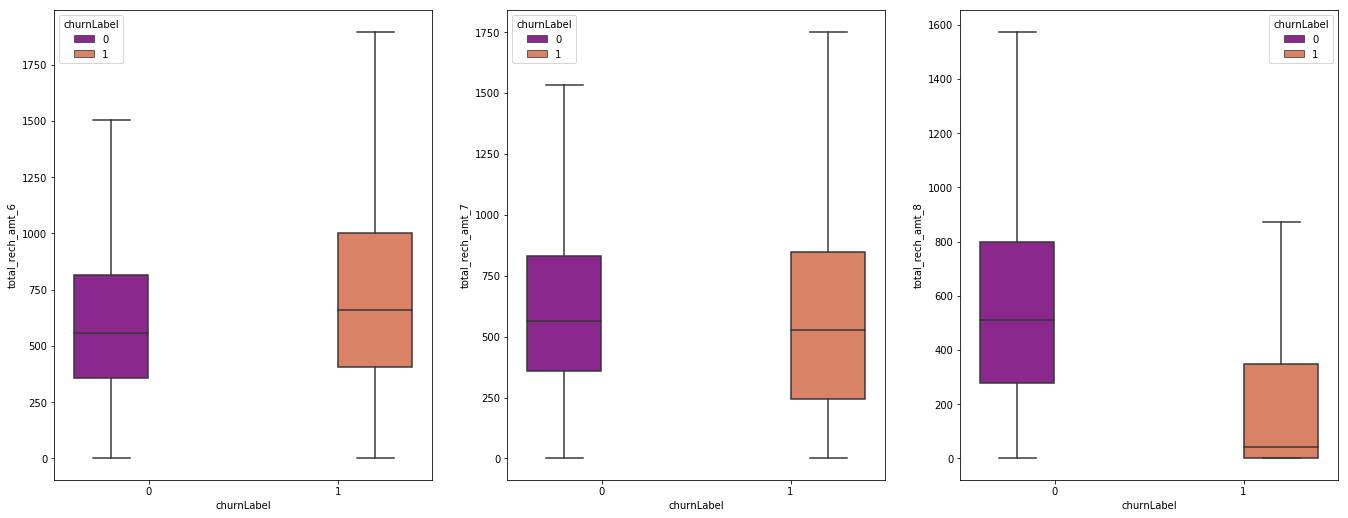

In [527]:
plottingRelation("total_rech_amt")

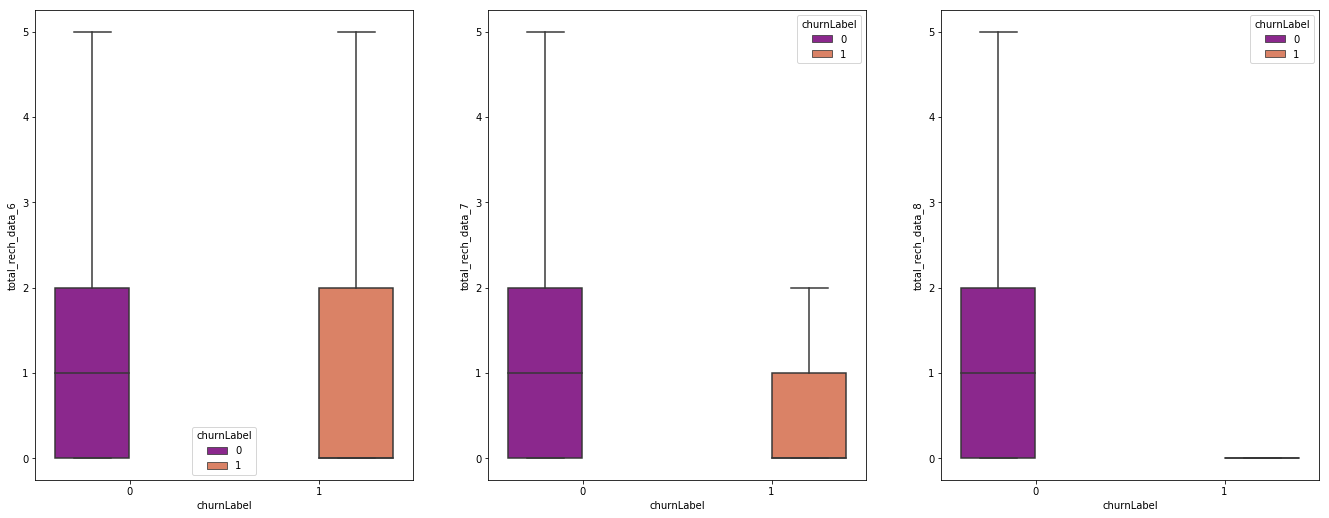

In [528]:
plottingRelation("total_rech_data")

### by this we can conclude that the customers which are not recharging data would be churned out , SO Company should focus on this part

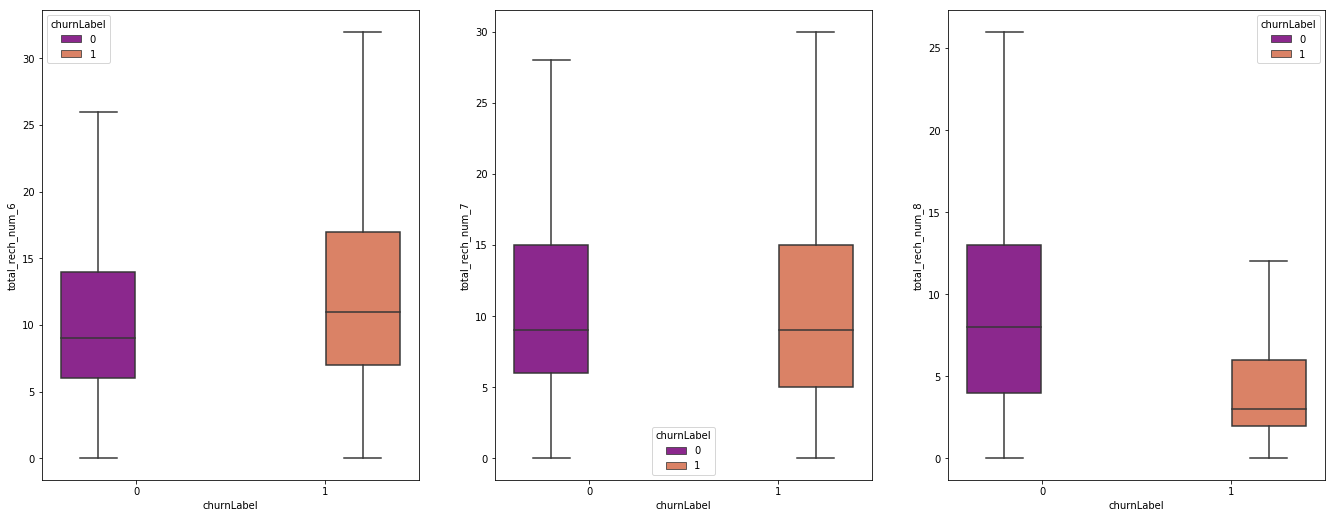

In [529]:
plottingRelation('total_rech_num')

### Company should focus less on the customers which are recharging weekly or daily basis as they are not likely to churn out as per the data

### now we find the customers based on maximum recharge they had done

In [530]:
amtcolm = df_highValueCustomer.columns[df_highValueCustomer.columns.str.contains('max_rech')]
display(amtcolm)
amtcolm = amtcolm.tolist()

Index(['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

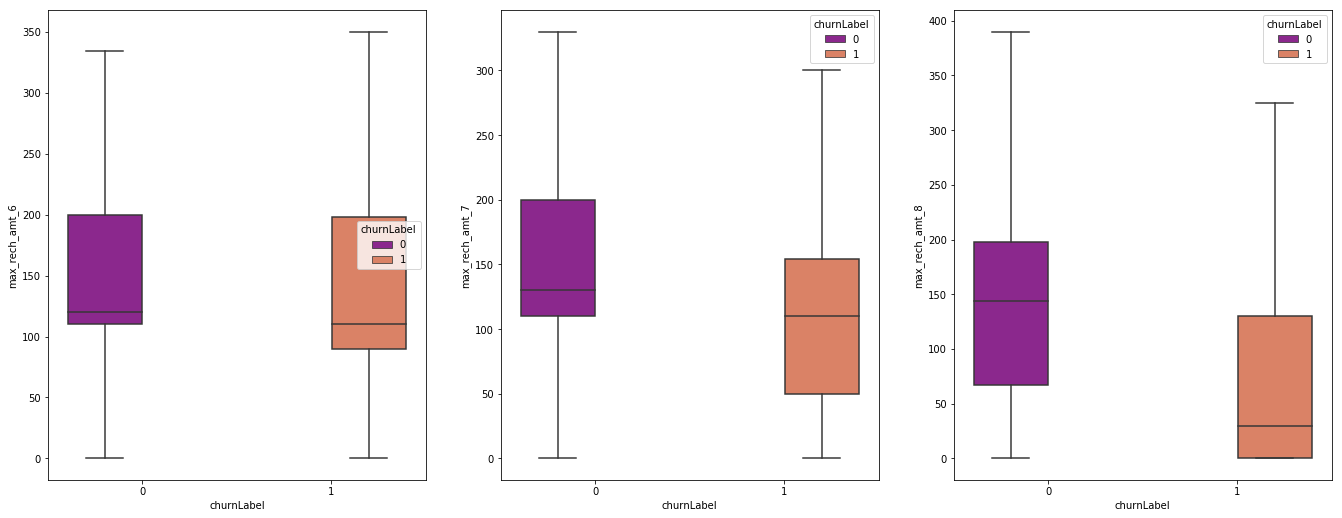

In [531]:
plottingRelation('max_rech_amt')

### plotting max relation for maximum recharge

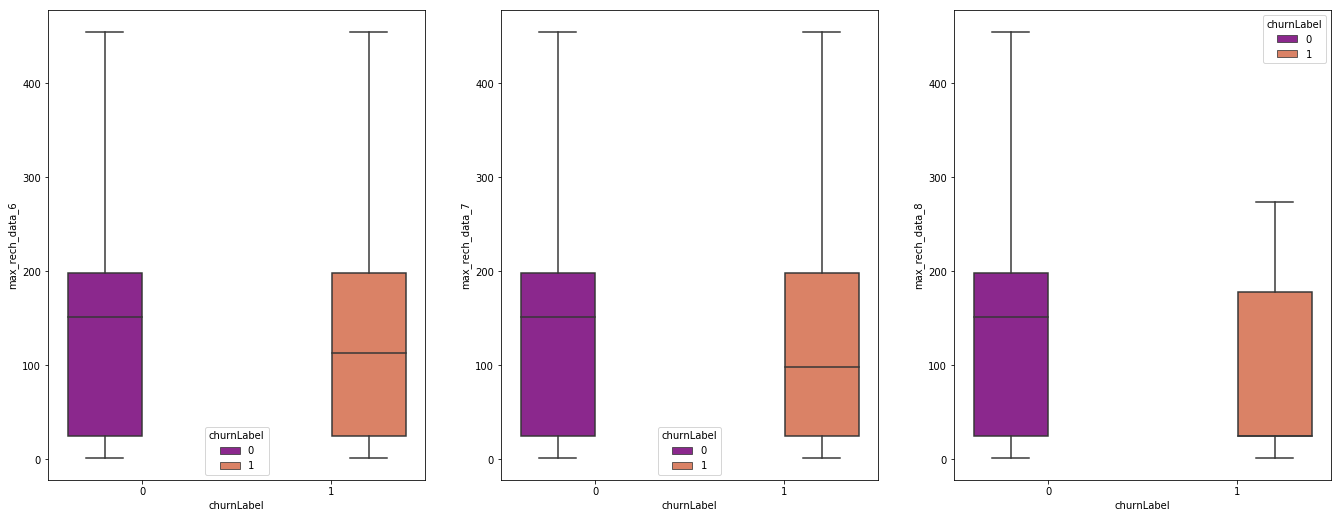

In [532]:
plottingRelation('max_rech_data')

### we can draw an inference like recharging doesn't have any impact on the churned Label , it's almost same for all the three months

In [533]:
Internetcolm = df_highValueCustomer.columns[df_highValueCustomer.columns.str.contains('2g|3g')]

In [534]:
Internetcolm

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

## Utility for checking the null percentage in a selected  list of columns

percentageOfMissingValue = pd.DataFrame()
def percentageMissing(listofColm):
    percentmiss = df_highValueCustomer[listofColm].isnull().sum() * 100 / len(df_highValueCustomer)
    percentageOfMissingValue = pd.DataFrame({'column_name': df_highValueCustomer[listofColm],
                                 'missing percentage': percentmiss})
    display(percentageOfMissingValue)

percentageMissing(Internetcolm)

### count of recharge listed columns have a lot of missing values and on top of that , these info wont tell whether the customer would be churned or not as the customer can recharge only once and use for the whole month or maybe like for a quarter of year . Hence dropping these colmns

### now there are missing values in various need to impute them with zero

In [535]:
df_highValueCustomer.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'],axis=1,inplace=True)
df_highValueCustomer.drop(['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'],axis=1,inplace=True)
df_highValueCustomer.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis =1, inplace=True)

In [536]:
df_highValueCustomer.shape

(29953, 152)

In [537]:
vbcRelatedColm = df_highValueCustomer.columns[df_highValueCustomer.columns.str.contains('vbc')]
display(vbcRelatedColm)

Index(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

In [538]:
df_highValueCustomer.head(2)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,totalRecharge6,totalRecharge7,totalRecharge8,totalRecharge6&7,churnLabel
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.0,422.16,533.91,255.79,4.3,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.5,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1


In [539]:
lastDayRelatedColm = df_highValueCustomer.columns[df_highValueCustomer.columns.str.contains('last_day_rch_amt')]
display(lastDayRelatedColm)

Index(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'], dtype='object')

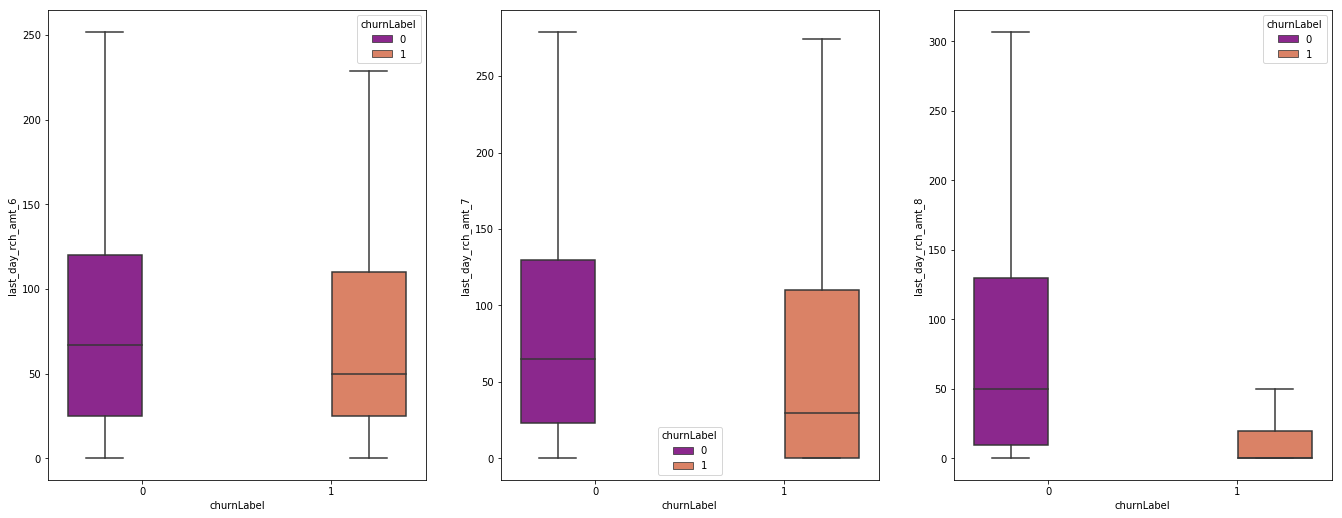

In [540]:
plottingRelation('last_day_rch_amt')

### We can clearly see that the customers in the 3rd month would be churning out in huge counts

In [541]:
dateLastRechRelatedColm = df_highValueCustomer.columns[df_highValueCustomer.columns.str.contains('date_of_last_rech_data')]
display(dateLastRechRelatedColm)

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

#### as we already has total last number of days  , so we can drop the date columns

In [542]:
df_highValueCustomer.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],axis=1,inplace=True)

In [543]:
df_highValueCustomer.shape

(29953, 149)

### since previously we have created a new column by the multiplication of average and number of total recharge so we can drop those rows

In [544]:
# df_highValueCustomer[['av_rech_amt_data_6','total_rech_data_6']]
df_highValueCustomer.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']
                          ,axis =1 , inplace= True)



## as from the assignment we know that 6&7 month are considered to be the good phase and 8th month is the period when the customer has started to churned . So we can take the mean of the 6 & 7Th phase

In [545]:
# df_highVa = pd.DataFrame
df_highValueCustomer['arpu_mean_6&7'] = df_highValueCustomer[['arpu_6','arpu_7']].mean(axis=1)
df_highValueCustomer.drop(['arpu_6','arpu_7'],axis =1 , inplace=True)

In [546]:
def calculateMeanCreateNewColm(col1 ,col2, basicName):
    df_highValueCustomer[basicName] = df_highValueCustomer[[col1,col2]].mean(axis=1)
    df_highValueCustomer.drop([col1,col2] , axis=1, inplace=True)

missPercentage = df_highValueCustomer.isnull().sum() * 100 / len(df_highValueCustomer)
missPercentage

### fb users were previously imputed and there are more than 47% so we can drop them , also we already have onnet and offnet usage so we basically dont need it

In [547]:
df_highValueCustomer.drop(['fb_user_6','fb_user_7','fb_user_8'],axis=1, inplace=True)

In [548]:
FinalMissingValues = ['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8',
                      'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
                     'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_6',
                      'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                     'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']

In [549]:
df_highValueCustomer[FinalMissingValues]= df_highValueCustomer[FinalMissingValues].fillna(0)

In [550]:
df_highValueCustomer.std_ic_t2f_mou_7

0          NaN
7        34.24
8         0.00
21        0.00
23        0.00
33        0.96
38        0.00
41        1.40
48        0.00
53        0.00
56        0.00
57        0.70
61        0.76
67        0.00
69        0.00
73        0.00
77        0.00
86        0.00
87        0.00
91        1.85
92        0.00
96        0.00
101       0.35
102       0.56
103       1.05
104       0.00
105       3.88
111       0.00
115       2.91
124       0.00
         ...  
99896     0.00
99899    10.93
99902     0.00
99903     0.00
99904     2.43
99921     0.00
99922     0.00
99923     2.53
99924     3.06
99925     0.00
99927     0.00
99929     0.00
99931     1.74
99935     0.00
99937     0.00
99939     0.00
99941     0.00
99942    10.03
99947     0.00
99955     0.00
99957     0.00
99959     0.00
99963     0.00
99965     0.00
99970     0.00
99981     6.51
99984     1.04
99986     2.73
99988     0.00
99997     0.00
Name: std_ic_t2f_mou_7, Length: 29953, dtype: float64

In [551]:
calculateMeanCreateNewColm('onnet_mou_6','onnet_mou_7','onnet_mou_Mean6&7')
calculateMeanCreateNewColm('offnet_mou_6','offnet_mou_7','offnet_mou_Mean6&7')
calculateMeanCreateNewColm('roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_Mean6&7')
calculateMeanCreateNewColm('roam_og_mou_6','roam_og_mou_7','roam_og_mou_Mean6&7')
calculateMeanCreateNewColm('loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_Mean6&7')   
calculateMeanCreateNewColm('loc_og_t2m_mou_6','loc_og_t2m_mou_6','loc_og_t2m_mou_Mean6&7')        
calculateMeanCreateNewColm('loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_Mean6&7')    
calculateMeanCreateNewColm('loc_og_mou_6','loc_og_mou_7','loc_og_mou_Mean6&7')
calculateMeanCreateNewColm('std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_Mean6&7')        
calculateMeanCreateNewColm('std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_Mean6&7')
calculateMeanCreateNewColm('std_og_mou_6','std_og_mou_7','std_og_mou_Mean6&7')
calculateMeanCreateNewColm('isd_og_mou_6','isd_og_mou_7','isd_og_mou_Mean6&7')
calculateMeanCreateNewColm('spl_og_mou_6','spl_og_mou_7','spl_og_mou_Mean6&7')
calculateMeanCreateNewColm('og_others_6','og_others_7','og_others_Mean6&7')
calculateMeanCreateNewColm('total_og_mou_6','total_og_mou_7','total_og_mou_Mean6&7')
calculateMeanCreateNewColm('loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_Mean6&7')
calculateMeanCreateNewColm('loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_Mean6&7')
calculateMeanCreateNewColm('loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_Mean6&7')
calculateMeanCreateNewColm('loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_Mean6&7')
calculateMeanCreateNewColm('std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_Mean6&7')
calculateMeanCreateNewColm('std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_Mean6&7')
calculateMeanCreateNewColm('std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_Mean6&7')
calculateMeanCreateNewColm('vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_mou_Mean6&7')
#calculateMeanCreateNewColm('night_pck_user_6','night_pck_user_7','night_pck_user_Mean6&7')
calculateMeanCreateNewColm('monthly_2g_6','monthly_2g_7','monthly_2g_Mean6&7')
calculateMeanCreateNewColm('sachet_2g_6','sachet_2g_7','sachet_2g_Mean6&7')
calculateMeanCreateNewColm('monthly_3g_6','monthly_3g_7','monthly_3g_Mean6&7')
calculateMeanCreateNewColm('std_ic_mou_6','std_ic_mou_7','std_ic_mou_Mean6&7')
calculateMeanCreateNewColm('total_ic_mou_6','total_ic_mou_7','total_ic_mou_Mean6&7')
calculateMeanCreateNewColm('spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_Mean6&7')
calculateMeanCreateNewColm('isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_Mean6&7')
calculateMeanCreateNewColm('ic_others_6','ic_others_7','ic_others_Mean6&7')
calculateMeanCreateNewColm('max_rech_amt_6','max_rech_amt_7','max_rech_amt_Mean6&7')



 

### dropping the number of recharge as we already have the total amount of charge done by the customer.

In [552]:
df_highValueCustomer.drop(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'],axis=1 , inplace=True)
df_highValueCustomer.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],axis=1, inplace=True)
df_highValueCustomer.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1, inplace=True)

In [553]:
finalList = ['std_og_t2t_mou_8' ,'std_og_t2m_mou_8','std_og_t2f_mou_6',
             'std_og_t2f_mou_7','std_og_t2f_mou_8' ,'std_og_mou_8'               
,'isd_og_mou_8','spl_og_mou_8', 'og_others_8'                
,'total_og_mou_8'             
,'loc_ic_t2t_mou_8'           
,'loc_ic_t2m_mou_8'          
,'loc_ic_t2f_mou_8'           
,'loc_ic_mou_8'               
,'std_ic_t2t_mou_8'          
,'std_ic_t2m_mou_8']

In [554]:
df_highValueCustomer[finalList]= df_highValueCustomer[finalList].fillna(0)

In [555]:
df_highValueCustomer.fillna(0)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,totalRecharge6,totalRecharge7,totalRecharge8,totalRecharge6&7,churnLabel,arpu_mean_6&7,onnet_mou_Mean6&7,offnet_mou_Mean6&7,roam_ic_mou_Mean6&7,roam_og_mou_Mean6&7,loc_og_t2t_mou_Mean6&7,loc_og_t2m_mou_Mean6&7,loc_og_t2c_mou_Mean6&7,loc_og_mou_Mean6&7,std_og_t2t_mou_Mean6&7,std_og_t2m_mou_Mean6&7,std_og_mou_Mean6&7,isd_og_mou_Mean6&7,spl_og_mou_Mean6&7,og_others_Mean6&7,total_og_mou_Mean6&7,loc_ic_t2t_mou_Mean6&7,loc_ic_t2m_mou_Mean6&7,loc_ic_t2f_mou_Mean6&7,loc_ic_mou_Mean6&7,std_ic_t2t_mou_Mean6&7,std_ic_t2f_mou_Mean6&7,std_ic_t2m_mou_Mean6&7,vol_2g_mb_mou_Mean6&7,monthly_2g_Mean6&7,sachet_2g_Mean6&7,monthly_3g_Mean6&7,std_ic_mou_Mean6&7,total_ic_mou_Mean6&7,spl_ic_mou_Mean6&7,isd_ic_mou_Mean6&7,ic_others_Mean6&7,max_rech_amt_Mean6&7
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,362,252,252,252,252,252,252,252.0,252.0,252.0,5.75,83.57,150.76,109.61,0,0,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1,206.1005,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,15.725,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000,252.0
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,447.38,162.28,62.13,55.14,53.23,0.00,255.79,12.01,49.14,6.66,20.08,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.00,31.59,15.14,1580,790,3638,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1,1209.5150,56.260,510.295,24.860,18.165,41.385,308.63,0.000,478.035,13.795,40.825,68.000,0.090,2.250,0.000,548.385,45.200,219.525,126.810,391.555,24.360,43.215,109.215,0.000,0.0,0.0,0.0,176.810,592.250,0.105,8.295,15.465,1185.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,70.58,50.54,0.00,0.00,0.00,7.15,63.04,22.58,75.69,0.00,0.00,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.00,0.00,0.00,437,601,120,30,50,0,10,0.0,154.0,23.0,0.03,0.00,750.95,11.94,0,3,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0,435.4720,382.360,87.645,0.000,0.000,257.360,80.96,0.000,333.135,124.995,11.865,136.870,0.000,0.000,0.000,470.010,16.840,35.780,0.000,52.630,0.290,0.000,13.255,178.000,0.5,0.5,0.0,13.545,66.175,0.000,0.000,0.000,122.0
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,87.93,104.81,0.75,0.00,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.00,0.00,0.00,600,680,718,50,30,20,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0,556.1030,117.260,827.305,0.000,0.000,5.320,91.81,0.000,95.565,111.935,737.050,848.990,0.000,0.000,0.000,944.565,6.335,96.430,3.725,106.505,10.020,0.000,52.960,0.000,0.0,0.0,0.0,62.985,169.490,0.000,0.000,0.000,50.0
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,83.01,148.56,0.00,0.00,0.00,17.71,182.14,0.00,39.61,0.00,0.00,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.9

In [556]:
# df_highValueCustomer['max_rech_amt_8'].isnull().sum()

(df_highValueCustomer.isnull().sum()*100/ len(df_highValueCustomer)).sort_values(ascending = False)

max_rech_data_8           46.799987
max_rech_data_6           44.112443
max_rech_data_7           43.117551
std_ic_t2f_mou_8           3.912797
std_ic_mou_8               3.912797
spl_ic_mou_8               3.912797
ic_others_8                3.912797
isd_ic_mou_8               3.912797
og_others_Mean6&7          0.998231
loc_ic_t2t_mou_Mean6&7     0.998231
ic_others_Mean6&7          0.998231
std_og_t2t_mou_Mean6&7     0.998231
std_og_t2m_mou_Mean6&7     0.998231
std_og_mou_Mean6&7         0.998231
isd_og_mou_Mean6&7         0.998231
spl_og_mou_Mean6&7         0.998231
loc_ic_t2m_mou_Mean6&7     0.998231
loc_ic_t2f_mou_Mean6&7     0.998231
loc_ic_mou_Mean6&7         0.998231
std_ic_t2t_mou_Mean6&7     0.998231
std_ic_t2f_mou_Mean6&7     0.998231
std_ic_t2m_mou_Mean6&7     0.998231
std_ic_mou_Mean6&7         0.998231
spl_ic_mou_Mean6&7         0.998231
isd_ic_mou_Mean6&7         0.998231
loc_ic_mou_8               0.000000
loc_ic_t2t_mou_8           0.000000
loc_ic_t2m_mou_8           0

In [557]:
remainlist = ['max_rech_data_8',           
'max_rech_data_6',           
'max_rech_data_7',    
'std_ic_t2f_mou_8',          
'std_ic_mou_8',              
'spl_ic_mou_8',              
'ic_others_8',               
'isd_ic_mou_8',          
'std_ic_t2f_mou_Mean6&7',    
'std_og_mou_Mean6&7',        
'isd_og_mou_Mean6&7','og_others_Mean6&7','std_og_t2m_mou_Mean6&7','std_og_t2t_mou_Mean6&7','spl_og_mou_Mean6&7',         
'loc_ic_t2f_mou_Mean6&7',     
'loc_ic_t2t_mou_Mean6&7',     
'loc_ic_t2m_mou_Mean6&7',    
'loc_ic_mou_Mean6&7',         
'std_ic_t2t_mou_Mean6&7',     
'std_ic_t2m_mou_Mean6&7' ,    'std_ic_mou_Mean6&7',    
'spl_ic_mou_Mean6&7' ,        
'isd_ic_mou_Mean6&7'  , 'ic_others_Mean6&7'  ]

In [558]:
df_highValueCustomer[remainlist]= df_highValueCustomer[remainlist].fillna(0)

### need to convert the AgeOnNetwork column to the number of months so that it can be more understandable and can be scaled more easily

In [559]:
df_highValueCustomer['aon_Monthly'] = df_highValueCustomer['aon']/30
df_highValueCustomer.drop('aon',axis=1,inplace=True)

In [560]:
df_highValueCustomerFinal = df_highValueCustomer

#### splitting X and Y datasets

In [561]:
X = df_highValueCustomer.drop(['churnLabel'],axis=1)
y = df_highValueCustomer['churnLabel']

In [562]:
cols = X.columns

In [563]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [564]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,random_state=42)
objlogregression = LogisticRegression()
objlogregression.svm = SVC(kernel='linear') 
objlogregression.svm.fit(X_train,y_train)
preds = objlogregression.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.91842866681504565

#### would be doing the SMOTE analysis as the dataset is imbalanced  and then would apply PCA so as we dont loose the information

In [566]:
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [567]:
sm = SMOTE(random_state=42, sampling_strategy=0.6)
Xtr,ytr = sm.fit_sample(X_train,y_train)
pca = PCA(random_state =42)

In [568]:
pca.fit(Xtr)

PCA(random_state=42)

In [569]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

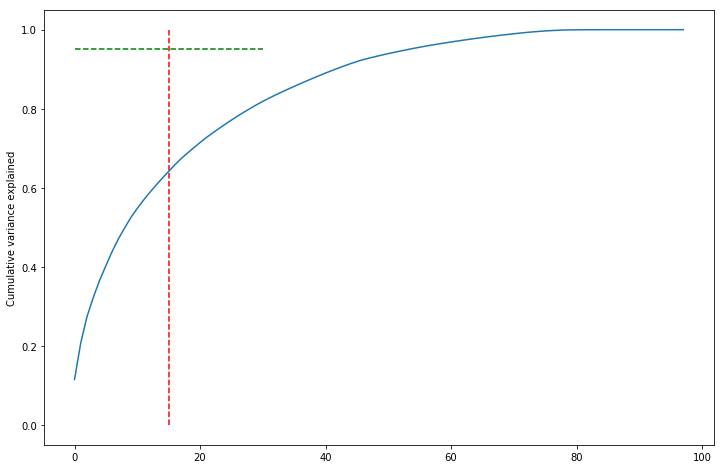

In [570]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### performing PCA with 18 components

In [571]:
pca = IncrementalPCA(n_components=18)
Xtrpca = pca.fit_transform(Xtr)
Xtestpca = pca.transform(X_test)


In [572]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [573]:
logr_pca = LogisticRegression()
logr_pca.svm = SVC(kernel='linear') 
logr_pca.svm.fit(Xtrpca,ytr)
preds = logr_pca.svm.predict(Xtestpca)

In [574]:
metrics.accuracy_score(y_test, preds)

0.88393055864678394

#### here we can see the accuracy score has been dropped after applying SMOTE

In [575]:
confusion = metrics.confusion_matrix(y_test,preds )
confusion

array([[7404,  844],
       [ 199,  539]], dtype=int64)

In [576]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

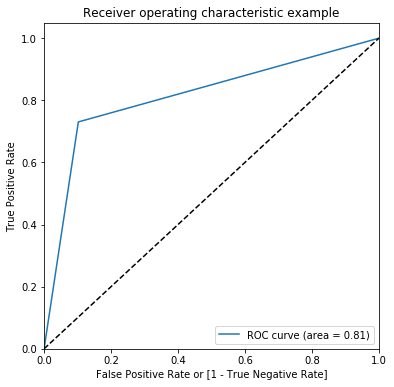

(array([ 0.        ,  0.10232784,  1.        ]),
 array([ 0.       ,  0.7303523,  1.       ]),
 array([2, 1, 0]))

In [577]:
draw_roc(y_test,preds)

### Important features as per PCA

In [578]:
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':cols})
df_pca.head(30)


,Feature,PC1,PC2,PC3
0,mobile_number,0.032397,-0.022283,0.038577
1,arpu_8,0.225114,-0.045606,-0.127530
2,onnet_mou_8,0.141794,0.104408,-0.073470
3,offnet_mou_8,0.191514,0.058091,-0.028492
4,roam_ic_mou_8,0.025382,0.013481,-0.073748
5,roam_og_mou_8,0.052340,0.026130,-0.116403
6,loc_og_t2t_mou_8,0.107749,-0.024619,0.078315
7,loc_og_t2m_mou_7,0.166007,-0.060631,0.154155
8,loc_og_t2m_mou_8,0.166905,-0.074888,0.135835
9,loc_og_t2f_mou_6,0.069071,-0.059872,0.060695


#### applying RFE to see the important variables before applying PCA on a linear Regression model

In [579]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [580]:
dfRfe= df_highValueCustomer

In [581]:
data_train,data_test=train_test_split(dfRfe,train_size=0.70, random_state=100)
data_train.shape

(20967, 99)

In [582]:
y_train = data_train.churnLabel
X_train = data_train.drop("churnLabel",1)

y_test= data_test.churnLabel
X_test = data_test.drop("churnLabel",1)

In [583]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=40)
rfe=rfe.fit(X_train,y_train)
col=X_train.columns[rfe.support_]
col

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'monthly_2g_8', 'loc_og_t2t_mou_Mean6&7', 'loc_og_t2m_mou_Mean6&7',
       'loc_og_mou_Mean6&7', 'loc_ic_t2t_mou_Mean6&7',
       'loc_ic_t2m_mou_Mean6&7', 'loc_ic_t2f_mou_Mean6&7',
       'loc_ic_mou_Mean6&7', 'std_ic_t2t_mou_Mean6&7',
       'std_ic_t2f_mou_Mean6&7', 'std_ic_t2m_mou_Mean6&7',
       'std_ic_mou_Mean6&7', 'spl_ic_mou_Mean6&7'],
      dtype='object')

### above are the important features as per RFE

In [584]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [585]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [586]:
cop = confusion_matrix(y_test,y_pred)
cop

array([[8140,  165],
       [ 332,  349]], dtype=int64)

In [587]:
param_grid = {'learning_rate': [0.2,0.4], 
             'subsample': [0.4,0.5]}          
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

In [588]:
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.4min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [589]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [590]:
print('Accuracy is **'+str(round(model_cv.best_score_,2))+'** using '+str(model_cv.best_params_))

Accuracy is **0.94** using {'learning_rate': 0.2, 'subsample': 0.5}
